# Package

In [12]:
from ISLP import load_data
import pandas as pd
from matplotlib.pyplot import subplots

# a) Load Data

In [13]:
Boston_df = load_data("Boston")

# b) rows in data

In [14]:
print("La donnée Boston contient", Boston_df.shape[0], "observations", "et", Boston_df.shape[1], "variables.")

La donnée Boston contient 506 observations et 13 variables.


In [15]:
Boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


- crim : 	Taux de criminalité par commune.
- zn : 	Proportion de zones résidentielles consacrées à de grands lots (> 25 000 sq.ft).
- indus : 	Proportion de terrains non commerciaux (industries) par commune.
- chas : 	Variable binaire indiquant si la commune borde la rivière Charles (1 = oui, 0 = non).
- nox : 	Concentration en oxydes d’azote (pollution), en parties par 10 millions.
- rm :	Nombre moyen de pièces par logement.
- age :	Pourcentage de logements construits avant 1940.
- dis :	Distance moyenne aux principaux centres d’emploi de Boston.
- rad :	Index d’accessibilité au réseau autoroutier radial.
- tax :	Taux d’imposition foncière (par 10 000 dollars).
- ptratio :	Ratio élèves / enseignants par commune.
- lstat : 	Pourcentage de la population à faible statut socio-économique.
- medv : 	Valeur médiane des logements (en milliers de dollars).

# c) scatterplots predicators

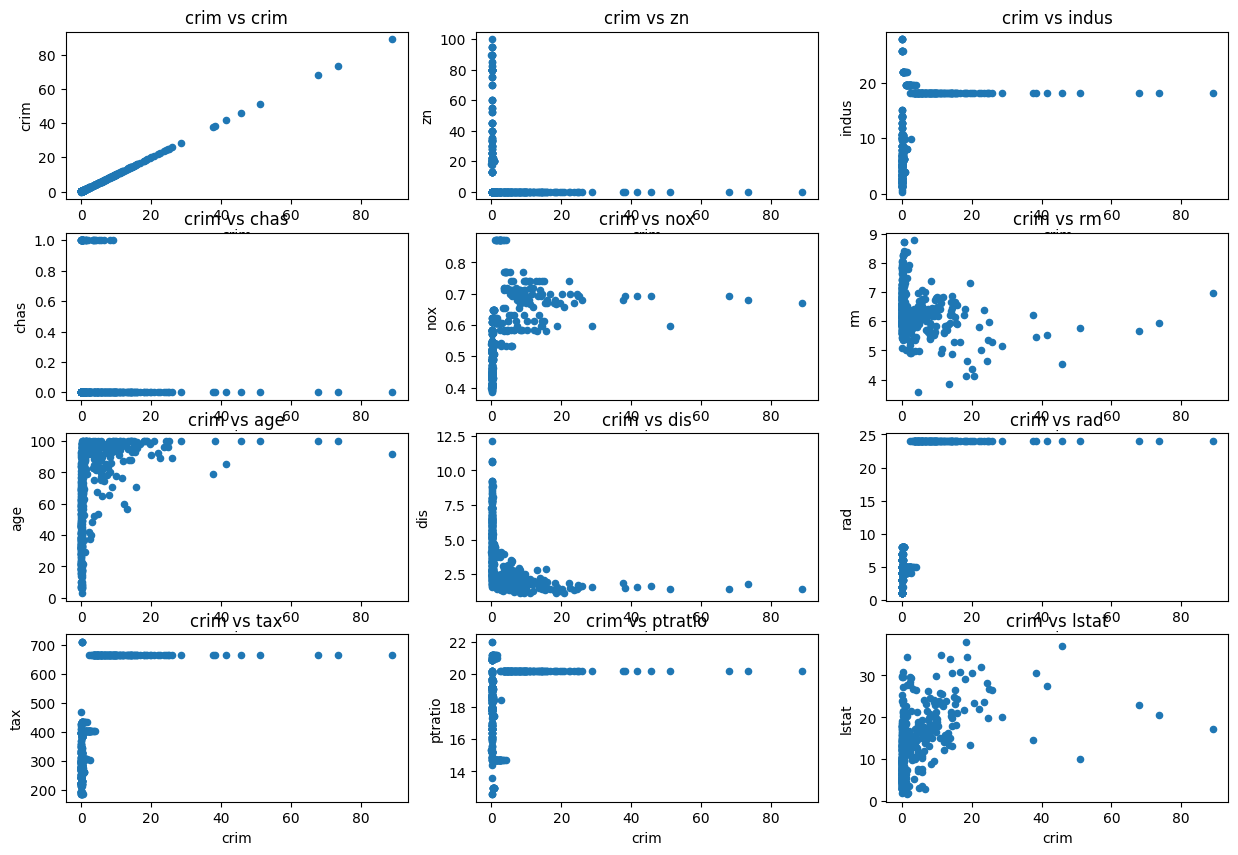

In [18]:
cols = Boston_df.columns.to_list()
# Crime et les autres variables
fig, axes = subplots(nrows=4, ncols=3, figsize = (15,10))
for ax, col in zip(axes.flat, cols) :
    Boston_df.plot.scatter(x = 'crim', y = col, ax = ax)
    ax.set_title(f"crim vs {col}")

In [19]:
# Pour apprécier la tendance médiane
Boston_df["crim"].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: crim, dtype: float64

- On voit que le taux de criminalité est faible par excellence. 50% des valeurs sont moins de 25% de criminalité.

- Des faibles taux de criminalités sont liées à des zones résidentiels riches et vice versa. Cette relation n'est pas linéaire.

- La zone industrielle, lorsqu'elle est très concentrée, explique la criminalité.

- Le fait d'être proche de la rivière fait diminuer la criminalité.

- La concentration d'oxyde d'azote pourrait expliquer la hausse de la criminalité. 

- Le nombre de pièces par logement impacterait négativement le taux de criminalité. 

- La criminalité évolue avec l'âge

- C'est dans la zone proche de l'axe routière que le taux de criminalité est élevée

- Le niveau de taxe foncière explique la criminalité. Plus, elle est élevée, plus la crime l'est aussi.

- Le nombre d'enseignants

- Plus il y a de personnes défavorisée économiquement, plus le taux de criminalité est élevée.

Notons que ces relations ne sont pas toutefois linéaires.

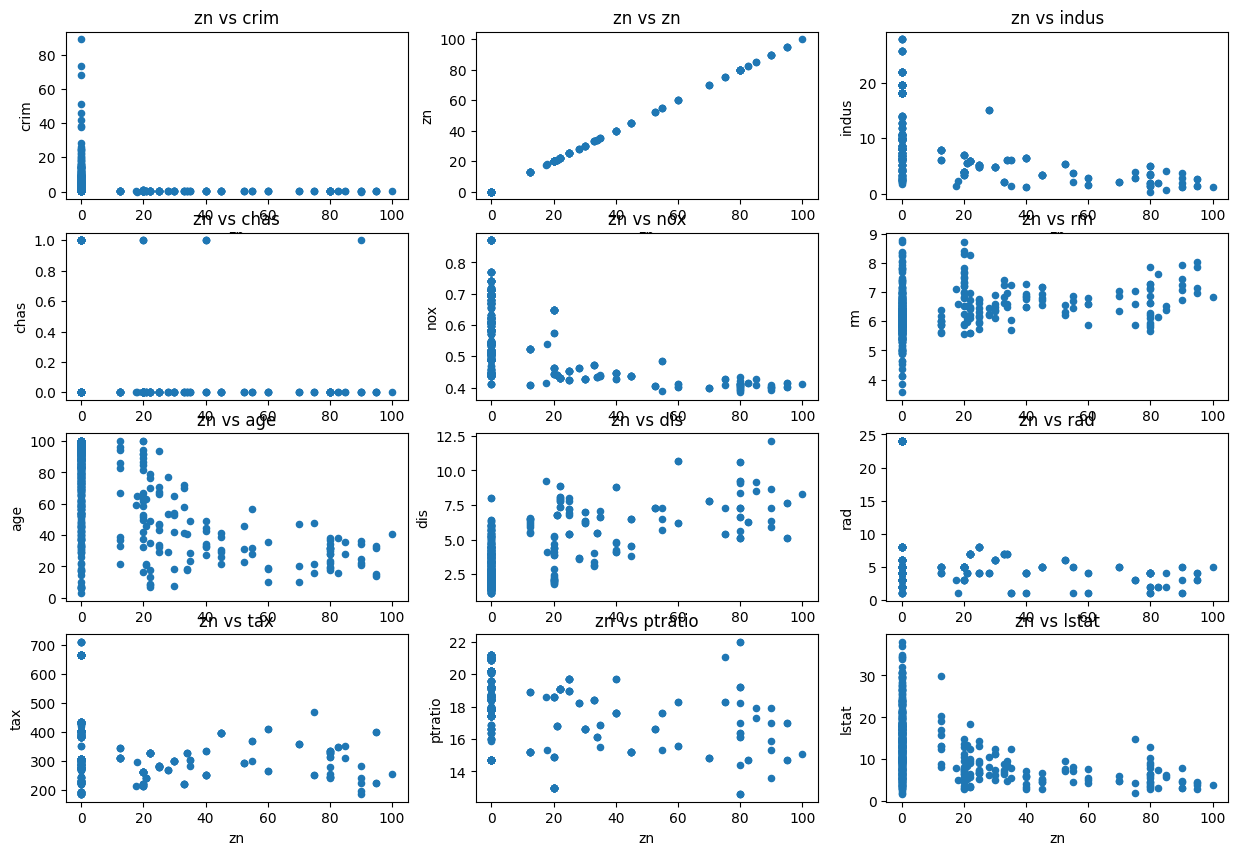

In [20]:
fig, axes = subplots(nrows=4, ncols=3, figsize = (15,10))
for ax, col in zip(axes.flat, cols) : 
    Boston_df.plot.scatter(x = 'zn', y = col, ax = ax)
    ax.set_title(f"zn vs {col}")

Certaines relations sont linéaires, d'autres non.

# f) Combien de banlieues dans cet ensemble de données sont situées le long de la rivière Charles ?

In [21]:
print(Boston_df["chas"].value_counts())
print(Boston_df["chas"].value_counts(normalize="True"))

chas
0    471
1     35
Name: count, dtype: int64
chas
0    0.93083
1    0.06917
Name: proportion, dtype: float64


Il y a uniquement 35 banlieu (7%) qui sont sur placées sur le long de la rive de Charles.

# g) What is the median pupil-teacher ratio among the towns in this data set?

Pour connaitre que le banlieu est proche de la ville, on fonde notre analyse sur : 
- rad (1) ; 
- dis relativement petit ; 
- chas = 0

In [30]:
Boston_df_town = Boston_df.loc[lambda df : (df["rad"] == 1) & 
              (df["dis"] <= df["dis"].quantile(0.5)) &
              (df["chas"] == 0)]

In [24]:
print("il y a en général", round(Boston_df_town.ptratio.median()), "élèves-enseignants dans la ville, contre" , round(Boston_df.ptratio.median()), "dans l'ensemble des données")

il y a en général 21 élèves-enseignants dans la ville, contre 19 dans l'ensemble des données


# h) h1) Quelle banlieue de Boston a la plus faible valeur médiane des logements occupés par leur propriétaire ? h2) Quelles sont les valeurs des autres variables prédictives pour cette banlieue, et comment ces valeurs se comparent-elles aux plages globales de ces variables ? h3) Commentez vos observations.

Concept : 
Banlieu : ce sont des maisons dans la périphérique du centre-ville

Quels indicateurs me permettent de confirmer qu'une maison est un banlieu ? 
1) Faibles dis :	Distance moyenne aux principaux centres d’emploi de Boston.
2) Faible ptratio :	Ratio élèves / enseignants par commune.
3) Elévé lstat : 	Pourcentage de la population à faible statut socio-économique.
4) Pas à côté de la rivière donc NON - chas : 	Variable binaire indiquant si la commune borde la rivière Charles (1 = oui, 0 = non).

Faible ici signifie valeurs au-dessous de Q1.

In [34]:
Boston_df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [53]:
# h1) 

Boston_df_banlieu = Boston_df.loc[lambda df : 
              (df["dis"] <= df["dis"].quantile(0.5)) &
              (df["ptratio"] <= df["ptratio"].quantile(0.25)) &
              (df["lstat"] <= df["lstat"].quantile(0.25)) &
              (df["chas"] == 0)
]

print("la valeur minimale de mediane d'un banlieu est donc :", Boston_df_banlieu["medv"].min(), '$.')

la valeur minimale de mediane d'un banlieu est donc : 24.3 $.


In [60]:
# h2) 
Boston_df_banlieu_mdv_faible = Boston_df_banlieu[Boston_df_banlieu["medv"] == Boston_df_banlieu["medv"].min()]

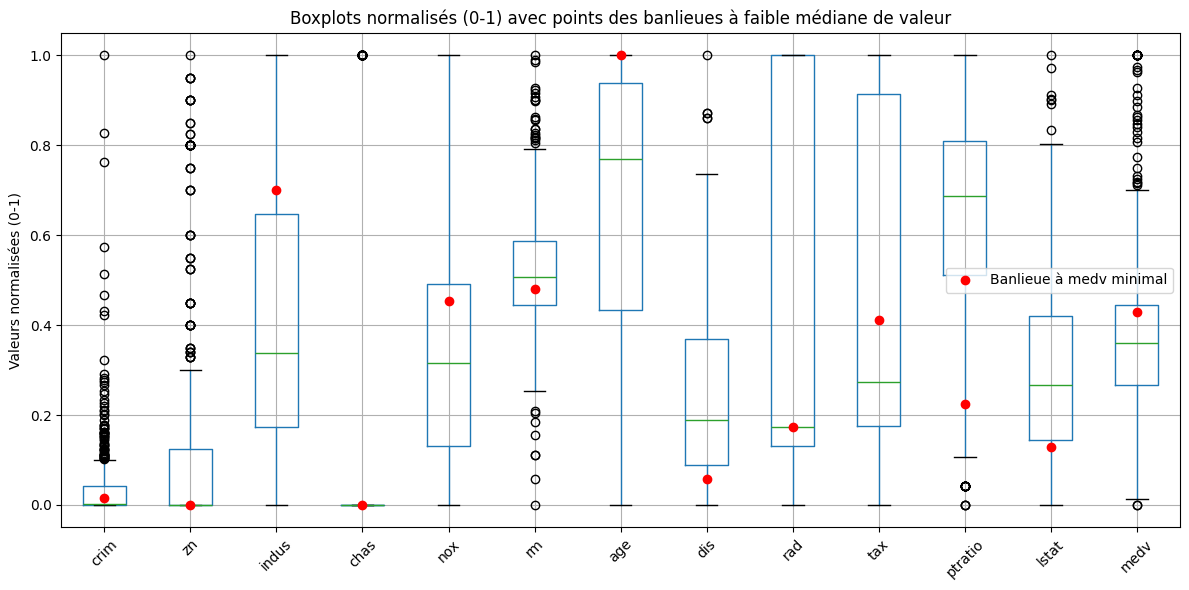

In [61]:
# 1️⃣ Colonnes numériques uniquement
numeric_cols = Boston_df.select_dtypes(include='number')

# 2️⃣ Normalisation min-max (de 0 à 1)
normalized = (numeric_cols - numeric_cols.min()) / (numeric_cols.max() - numeric_cols.min())

# 3️⃣ Identifier les banlieues à medv minimale
Boston_df_banlieu_mdv_faible
normalized_min_rows = normalized.loc[Boston_df_banlieu_mdv_faible.index]

# 4️⃣ Tracer les boxplots
plt.figure(figsize=(12, 6))
normalized.boxplot(rot=45)

# 5️⃣ Ajouter les points rouges des banlieues à medv minimal
for i in range(len(normalized_min_rows)):
    plt.scatter(
        range(1, len(normalized.columns) + 1),
        normalized_min_rows.iloc[i].values,
        color='red',
        label='Banlieue à medv minimal' if i == 0 else None,
        zorder=3
    )

plt.title("Boxplots normalisés (0-1) avec points des banlieues à faible médiane de valeur")
plt.ylabel("Valeurs normalisées (0-1)")
plt.legend()
plt.tight_layout()
plt.show()

- crim : 	Taux de criminalité par commune.
- zn : 	Proportion de zones résidentielles consacrées à de grands lots (> 25 000 sq.ft).
- indus : 	Proportion de terrains non commerciaux (industries) par commune.
- chas : 	Variable binaire indiquant si la commune borde la rivière Charles (1 = oui, 0 = non).
- nox : 	Concentration en oxydes d’azote (pollution), en parties par 10 millions.
- rm :	Nombre moyen de pièces par logement.
- age :	Pourcentage de logements construits avant 1940.
- dis :	Distance moyenne aux principaux centres d’emploi de Boston.
- rad :	Index d’accessibilité au réseau autoroutier radial.
- tax :	Taux d’imposition foncière (par 10 000 dollars).
- ptratio :	Ratio élèves / enseignants par commune.
- lstat : 	Pourcentage de la population à faible statut socio-économique.
- medv : 	Valeur médiane des logements (en milliers de dollars).

La banlieu avec des faibles valeurs ont les caractéristiques suivantes : 
- taux de criminalité relativement élevé ; 
- Proportion de terrains non commerciaux (industries) élevée ; 
- concentration en oxyde d'azote élevée ; 
- pièce dans la maison moins nombreux ; 
- ce sont des anciennes constructions en générale ; 
- taux d'imposition relativement couteux ; 
- sa valeur reste relativement élevée par rapport à d'autres types de logements.

# i) Pièces de logement et banlieu

- banlieu : déjà ok
- nombre de pièce : rm > 7

In [70]:
print("nombre de banlieu avec plus de 7 pièces: ", Boston_df_banlieu[Boston_df_banlieu["rm"] > 7].shape[0], ".")

nombre de banlieu avec plus de 7 pièces:  7 .


In [71]:
print("nombre de banlieu avec plus de 8 pièces: ", Boston_df_banlieu[Boston_df_banlieu["rm"] > 8].shape[0], ".")

nombre de banlieu avec plus de 8 pièces:  4 .


Quelles sont les banlieu avec plus de 8 pièces par logement? 

In [73]:
Boston_df_banlieu[Boston_df_banlieu["rm"] > 8]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
224,0.31533,0.0,6.20,0,0.504,8.266,78.3,2.8944,8,307,17.4,4.14,44.8
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,4.63,50.0
257,0.61154,20.0,3.97,0,0.647,8.704,86.9,1.8010,5,264,13.0,5.12,50.0
262,0.52014,20.0,3.97,0,0.647,8.398,91.5,2.2885,5,264,13.0,5.91,48.8


In [75]:
Boston_df.mean()

crim         3.613524
zn          11.363636
indus       11.136779
chas         0.069170
nox          0.554695
rm           6.284634
age         68.574901
dis          3.795043
rad          9.549407
tax        408.237154
ptratio     18.455534
lstat       12.653063
medv        22.532806
dtype: float64